# Notebook description
$\DeclareMathOperator{\Var}{Var}$
This notebook looks at the alpha synapse.

# Alpha function

The alpha synapse is so named because it's response to a spike (modeled by a delta function) is the alpha function.

\begin{equation*}
h(t) = \frac{1}{\tau^2}te^{-t/\tau} \quad \textrm{for } t\ge0
\end{equation*}

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import lambertw
from scipy.optimize import fsolve

def alpha(t, tau):
    """computes the spike (impulse) response of the alpha synapse"""
    ret = np.zeros_like(t)
    idx = t>=0
    ret[idx] = t[idx]*np.exp(-t[idx]/tau)/tau**2
    return ret

def step(t, tau):
    """computes the step response of the alpha synapse"""
    ret = np.zeros_like(t)
    idx = t>=0
    ret[idx] = 1-(t[idx]+tau)*np.exp(-t[idx]/tau)/tau
    return ret

def tau_a1(x):
    """computes the tau_a/tau_1 to match first-order and alpha synapse latencies"""
    assert np.all(x>=0), 'x must be >= 0'
    assert np.all(x<=1), 'x must be <= 1'
    ret = np.zeros_like(x)
    idx = np.logical_and(x>0, x<1)
    num = np.log(1-x[idx])
    den = 1+lambertw((x[idx]-1)/np.e, -1).real
    ret[idx] = num/den
    ret[x==0] = 0
    ret[x==1] = 1
    return ret

def tau_a1_inv(tat1):
    ret = fsolve(lambda x: tau_a1(x)-tat1, 0.5, )[0]
    return ret

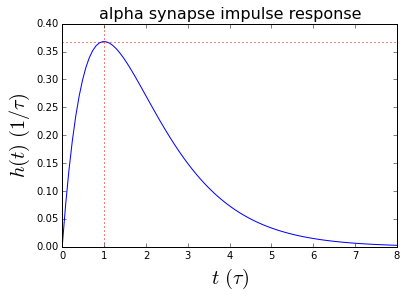

In [2]:
t = np.linspace(0, 8, 100)
h = alpha(t, 1)
plt.plot(t, h)
plt.axvline(1, c='r', ls=':')
plt.axhline(np.exp(-1), c='r', ls=':')
plt.xlabel(r'$t$ $(\tau)$', fontsize=20)
plt.ylabel(r'$h(t)$ $(1/\tau)$', fontsize=20)
plt.title('alpha synapse impulse response', fontsize=16);

Like the first-order synapse (a.k.a. exponential synapse), the alpha synapse also has unit area. To see this,

\begin{align*}
\int_{-\infty}^{\infty}h(t)dt &= \int_{0}^{\infty}\frac{1}{\tau^2}te^{-t/\tau}dt \\
 &= \frac{1}{\tau^2}\int_{0}^{\infty}te^{-t/\tau}dt \\
 &= \frac{1}{\tau^2}\left(\left[-\tau te^{-t/\tau}\right]_0^{\infty}-
    \int_{0}^{\infty}-\tau e^{-t/\tau}dt\right) & \textrm{integration by parts} \\
 &= \frac{1}{\tau^2}\left(0+\tau\int_{0}^{\infty}e^{-t/\tau}dt\right) \\
 &= \frac{1}{\tau^2}\left[-\tau^2e^{-t/\tau}\right]_{0}^{\infty} \\
 &= 1
\end{align*}

# Alpha synapse dynamics

From the impulse response, we can derive the transfer function and differential equation that governs the alpha synapse.

\begin{align*}
H(s) &= \mathcal{L}(h(t)) \\
 &= \frac{1}{\tau^2}\frac{1}{(s+\frac{1}{\tau})^2} \\
 &= \frac{1}{\tau^2}\frac{1}{(\frac{1}{\tau}(\tau s+1))^2} \\
 &= \frac{1}{(\tau s+1)^2} \\
 &= \frac{1}{\tau^2s^2+2\tau s+1} \\
\end{align*}

If we compare this result to the first-order synapse, we see how the alpha synapse arises from arranging two first-order synapses in series.

From the Laplace transform, we can derive the dynamical system

\begin{align*}
H(s) &= \frac{1}{\tau^2s^2+2\tau s+1} \\
\frac{X(s)}{U(s)} &= \frac{1}{\tau^2s^2+2\tau s+1} \\
(\tau^2s^2+2\tau s+1)X(s) &= U(s) \\
 \mathcal{L}&\updownarrow \\
\tau^2\ddot{x}+2\tau\dot{x}+x &= u \\
\end{align*}

Therefore

\begin{equation*}
\ddot{x} = -\frac{2}{\tau}\dot{x}-\frac{1}{\tau^2}x+u
\end{equation*}

We can rewrite this differential equation as a 2D dynamical system by defining state vector $\mathbf{x}=\begin{bmatrix}x_0\\x_1\end{bmatrix}$ and $x_0=\dot{x}$ and $x_1=x$ so that

\begin{align*}
\dot{x_0} &= -\frac{2}{\tau}x_0-\frac{1}{\tau^2}x_1+u \\
\dot{x_1} &= x_0
\end{align*}

\begin{align*}
\dot{
\begin{bmatrix}
x_0 \\ x_1
\end{bmatrix}}
 &=
\begin{bmatrix}
-2/\tau & 1/\tau^2 \\
1 & 0 \\
\end{bmatrix}
\begin{bmatrix}
x_0 \\ x_1
\end{bmatrix}
 +
\begin{bmatrix}
1 \\ 0
\end{bmatrix}
u
\end{align*}


# Mean, Variance, and SNR

We make use of [Campbell's theorem](../theory/campbells_theorem.ipynb) to find the mean and variance. 

\begin{align*}
E(\Sigma) &= \int_0^{\infty}\lambda\frac{1}{\tau^2}te^{-t/\tau}dt \\
 &= \lambda
\end{align*}

and

\begin{align*}
\Var(\Sigma) &= \int_0^{\infty}\lambda\left(\frac{1}{\tau^2}te^{-t/\tau}\right)^2dt \\
 &= \frac{\lambda}{\tau^4}\int_0^{\infty}t^2e^{-2t/\tau}dt \\
 &= \frac{\lambda}{\tau^4}\left(\left[-\frac{\tau}{2}t^2e^{-2t/\tau}\right]_0^\infty-
    \int_0^{\infty}-\tau te^{-2t/\tau}dt\right) & \textrm{integration by parts} \\
 &= \frac{\lambda}{\tau^4}\left(0+\tau
    \int_0^{\infty}te^{-2t/\tau}dt\right) \\
 &= \frac{\lambda}{\tau^3}\left(
    \int_0^{\infty}te^{-2t/\tau}dt\right) \\
 &= \frac{\lambda}{\tau^3}\left(\left[-\frac{\tau}{2}te^{-2t/\tau}\right]_0^\infty-
    \int_0^{\infty}-\frac{\tau}{2}e^{-2t/\tau}dt\right) & \textrm{integration by parts} \\
 &= \frac{\lambda}{\tau^3}\left(0+
    \frac{\tau}{2}\int_0^{\infty}e^{-2t/\tau}dt\right) \\
 &= \frac{\lambda}{2\tau^2}\left[-\frac{\tau}{2}e^{-2t/\tau}dt\right]_0^{\infty} \\
 &= \frac{\lambda}{4\tau} \\
\end{align*}

This yields

\begin{align*}
SNR &= \frac{\lambda}{\sqrt{\frac{\lambda}{4\tau}}} \\
 &= 2\sqrt{\lambda\tau} \\
\end{align*}

The alpha synapse has $\sqrt{2}$ improvement over the first-order synapse receiving Poisson spiking input, which has $SNR=\sqrt{2\lambda\tau}$. In other words, for fixed SNR, switching from the first-order synapse to the alpha synapse halves the value of $\lambda\tau$. Next, we'll compare the latency of the alpha synapse to the first-order synapse.

# Step response

A first order synapse will have a unit step response of $1-e^{-t/\tau}$. What is the step response of an alpha synapse? For a unit step, $U(s)=\frac{1}{s}$, so

\begin{align*}
X(s) &= H(s)U(s) \\
 &= \frac{1}{(\tau s+1)^2}\frac{1}{s} \\
 &= -\frac{\tau}{(\tau s+1)^2}-\frac{\tau}{\tau s+1}+\frac{1}{s} & \textrm{partial fraction expansion} \\
 &\updownarrow\mathcal{L} \\
x(t) &= -\tau\frac{1}{\tau^2}te^{-t/\tau}-\tau\frac{1}{\tau}e^{-t/\tau}+1 \\
 &= -\frac{1}{\tau}te^{-t/\tau}-e^{-t/\tau}+1 \\
 &= 1-\frac{1}{\tau}(t+\tau)e^{-t/\tau} \\
\end{align*}

The first-order synapse and alpha synapse unit step responses are plotted below.

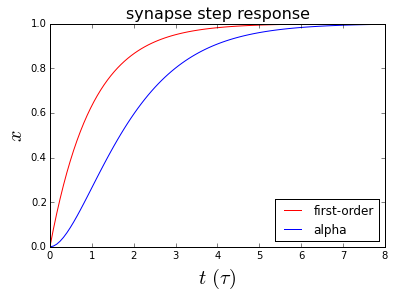

In [3]:
t = np.linspace(0, 8, 100)
x = step(t, 1)
plt.plot(t, 1-np.exp(-t), 'r', label='first-order')
plt.plot(t, x, label='alpha')
plt.legend(loc='lower right')
plt.xlabel(r'$t$ $(\tau)$', fontsize=20)
plt.ylabel(r'$x$', fontsize=20)
plt.title('synapse step response', fontsize=16);

The alpha synapse is slower than the first order synapse. This follows from considering the transfer function. High (fast) frequencies (of which a unit step has infinitely many) are attenuated more with the alpha synapse than the first-order synapse. 

# Match latency, compare SNR

So far, we've seen that the alpha synapse has better SNR but is slower than the first-order synapse. To decide whether an alpha synapse yields any gains over the first-order synapse, we need to compare the synapses in terms of an SNR and latency specification. Latency is the time it takes the step response to reach a given $x\in(0,1)$. We will find the relationship between the first-order synapse time constant, $\tau_\alpha$, and the alpha synapse time constant, $\tau_1$, required to satisfy a latency specification?

For a first-order synapse, the latency as a function of $x$ is simple.

\begin{align*}
x &= 1-e^{-t/\tau} \\
t &= -\tau\ln(1-x)
\end{align*}

For the alpha synapse, the latency is more complicated.

\begin{align*}
x &= 1-\frac{1}{\tau}(t+\tau)e^{-t/\tau} \\
\left(t+\tau\right)e^{-t/\tau} &= \tau(1-x) \\
\frac{-\tau}{-\tau}(t+\tau)e^{-(t+\tau-\tau)/\tau} &= \tau(1-x) \\
-\tau\frac{-(t+\tau)}{\tau}e^{-(t+\tau)/\tau+\tau/\tau} &= \tau(1-x) \\
-\tau\frac{-(t+\tau)}{\tau}e^{-(t+\tau)/\tau}e &= \tau(1-x) \\
-\frac{t+\tau}{\tau}e^{-(t+\tau)/\tau} &= \frac{x-1}{e} \\
-\frac{t+\tau}{\tau} &= W\left(\frac{x-1}{e}\right) \\
t &= -\tau\left(1+W\left(\frac{x-1}{e}\right)\right) \\
\end{align*}

where $W(\cdot)$ is the [Lambert W function](https://en.wikipedia.org/wiki/Lambert_W_function) (specifically, the $-1$ branch of the function given the range of $x$). 

To match the latency of the first-order and alpha synapses,

\begin{align*}
-\tau_1\ln(1-x) &= -\tau_\alpha\left(1+W\left(\frac{x-1}{e}\right)\right) \\
\frac{\tau_\alpha}{\tau_1} &= \frac{\ln(1-x)}{1+W\left(\frac{x-1}{e}\right)} \\
\end{align*}

This ratio is plotted below.

tau_a/tau_1=.5 at x=0.71533


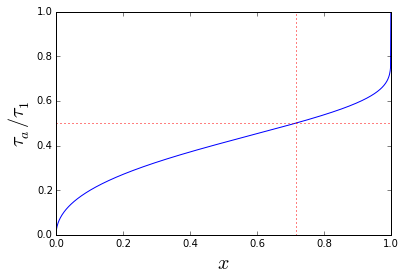

In [5]:
x = np.linspace(0, 1, 1000)
tat1 = tau_a1(x)
xcross = tau_a1_inv(.5)
print 'tau_a/tau_1=.5 at x=%.5f' % xcross
plt.plot(x, tat1)
plt.axhline(0.5, c='r', ls=':')
plt.axvline(xcross, c='r', ls=':')
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\tau_a/\tau_1$', fontsize=20);

Recall that the alpha synapse allows us to use half the $\lambda\tau$ required by the first order synapse to satisfy the same SNR. The above plot indicates that we can halve $\tau$ and maintain the same latency only if latency is defined as the time it takes the step response to reach $71.5%$ of the steady-state value. If latency is defined from a higher percentage of the steady-state value, then we increase $\tau_a$ but lower $\lambda$. If latency from as lower percentage of the steady-state value, then we decrease $\tau_a$ but increase $\lambda$.

# Conclusions

Still to come.

# Appendix

## Differential equation verification
Let's verify that the impulse response is consistent with this differential equation.

\begin{align*}
h(t) &= \frac{1}{\tau^2}te^{-t/\tau} \\
\dot{h}(t) &= \frac{1}{\tau^2}\left(e^{-t/\tau}-\frac{1}{\tau}te^{-t/\tau}\right) \\
 &= \frac{1}{\tau^2}e^{-t/\tau}-\frac{1}{\tau^3}te^{-t/\tau} \\
\ddot{h}(t) &= -\frac{1}{\tau^3}e^{-t/\tau}-
    \frac{1}{\tau^3}\left(e^{-t/\tau}-\frac{1}{\tau}te^{-t/\tau}\right) \\
 &= -\frac{2}{\tau^3}e^{-t/\tau}+\frac{1}{\tau^4}te^{-t/\tau} \\
\end{align*}

Now we'll verify that

\begin{align*}
\ddot{h} &= -\frac{2}{\tau}\dot{h}-\frac{1}{\tau^2}h \\
 &=  -\frac{2}{\tau}\left(\frac{1}{\tau^2}e^{-t/\tau}-\frac{1}{\tau^3}te^{-t/\tau}\right)
    -\frac{1}{\tau^2}\frac{1}{\tau^2}te^{-t/\tau} \\
 &= -\frac{1}{\tau^3}e^{-t/\tau}+\frac{1}{\tau^4}te^{-t/\tau} \\
\end{align*}

as we found earlier.